In [1]:
from neo_access import *
from get_response_prop import *
#from get_response_prop import calculate_bandwidth,response_detection_core#,build_pdf
import numpy as np
import matplotlib.pyplot as plt
from neo.io import PickleIO
import pandas as pd
import os
import glob
import seaborn as sns
from scipy.stats import wilcoxon
import numpy.ma as ma

def cut_data(selection,data,start_rel = None,end_rel = None,trials = None,samplingrate = None):

    '''function needs df row as input. also data needs to be 1d
        start_rel & end_rel means relative to stimulus start'''

    start = selection.pre[0] -start_rel
    end =  selection.pre[0] +end_rel
    #print(start)
    #print(end)

    raster = np.zeros([trials,int((end-start)*samplingrate)])
    #print(raster.shape)
    times = (data[:,0]/samplingrate)
    times_inx = data[:,1]
    times_cut = ((times[(times> start)&(times< end)]*samplingrate)-start*samplingrate).astype(int)
    times_inx_cut = times_inx[(times> start)&(times< end)].astype(int)
    raster[times_inx_cut,times_cut] = 1
    #cumsum_trials = np.cumsum(raster,axis=1)
    cumsum = np.sum((np.cumsum(raster,axis=1)),axis = 0)

    return raster,np.sort(times_cut),cumsum

In [2]:
structure='VPL'
exp_name = 'SNA_042178_probe1_001'
working_directory =r"F:\NeuropixelData\SNA-042178\2019-11-13_13-31-28"
sorting_number = 1

In [3]:
if structure == 'VPL':
    flag = 0
else:
    flag = 2

path = os.path.join(working_directory,r"experiment1\recording1\continuous\Neuropix-PXI-100.{}\Sorting\{}".format(flag,sorting_number))
metrics = pd.read_csv(os.path.join(path,"metrics.csv"),index_col=0)
df=pd.read_csv(os.path.join(path , 'cluster_KSLabel.tsv'),header=0, delim_whitespace=True)

mask = df['cluster_id'].isin(metrics['cluster_id'])
metrics['quality'] = df.loc[mask,'KSLabel']

nn_hit_rate_thr = 0.8
isi_thr = 0.2
amplitude_cutoff_thr = 0.1
isolation_distance_thr = 50
lratio_thr = 0.2
fr_ration = 0.1


metrics_clean= metrics[(metrics.isi_viol < isi_thr) & (metrics.amplitude_cutoff < amplitude_cutoff_thr)&
               (metrics.isolation_distance > isolation_distance_thr)&
               (metrics.l_ratio.dropna() < lratio_thr)&
               (metrics.nn_hit_rate.dropna() > nn_hit_rate_thr)&
               (metrics.quality == 'good')]

In [4]:
exp_id = exp_name.split('_')[-1]
wd = os.path.join(working_directory,'SpikeSortingResults_Probe_'+structure)


dataframe = pd.read_pickle(glob.glob(os.path.join(wd,'*df*.pkl'))[0])

trials = int(dataframe.trials[0])
sweeplength = int(dataframe.sweeplength[0])
samplerate = 30000



os.chdir(wd)
io = PickleIO(filename=os.path.basename(glob.glob(os.path.join(wd,'*data*.pkl'))[0]))
blk2 = io.read()[0]

selection = dataframe[(dataframe["cluster"] == dataframe.cluster[0]) & (dataframe["expID"] == exp_id)]
data = get_all_data(blk2,selection,raster=True,timestamps=True,spikes=True,aisignal=True)


amps = []
[amps.append(np.mean(np.mean(data[3][i],axis=1),axis =1)) for i in range(len(data[3]))]


selection = dataframe[(dataframe['expID'] == exp_id)]
data = get_all_data(blk2,selection,raster=True,timestamps=True,spikes=True,aisignal=True)
cluster_ids = list(np.unique(metrics_clean.index.values))
cluster_ids = list(map(str,cluster_ids))


['0_0', '0_0', '0_0', '0_0']
['0_1', '0_1', '0_0', '0_1']
['0_2', '0_2', '0_0', '0_2']
['0_3', '0_3', '0_0', '0_3']
['0_4', '0_4', '0_0', '0_4']
['0_5', '0_5', '0_0', '0_5']
['0_6', '0_6', '0_0', '0_6']
['0_7', '0_7', '0_0', '0_7']
['0_8', '0_8', '0_0', '0_8']
['0_9', '0_9', '0_0', '0_9']
['0_10', '0_10', '0_0', '0_10']
['0_0', '0_0', '0_0', '0_0']
['0_1', '0_1', '0_0', '0_1']
['0_2', '0_2', '0_0', '0_2']
['0_3', '0_3', '0_0', '0_3']
['0_4', '0_4', '0_0', '0_4']
['0_5', '0_5', '0_0', '0_5']
['0_6', '0_6', '0_0', '0_6']
['0_7', '0_7', '0_0', '0_7']
['0_8', '0_8', '0_0', '0_8']
['0_9', '0_9', '0_0', '0_9']
['0_10', '0_10', '0_0', '0_10']
['0_11', '0_0', '0_1', '0_0']
['0_12', '0_1', '0_1', '0_1']
['0_13', '0_2', '0_1', '0_2']
['0_14', '0_3', '0_1', '0_3']
['0_15', '0_4', '0_1', '0_4']
['0_16', '0_5', '0_1', '0_5']
['0_17', '0_6', '0_1', '0_6']
['0_18', '0_7', '0_1', '0_7']
['0_19', '0_8', '0_1', '0_8']
['0_20', '0_9', '0_1', '0_9']
['0_21', '0_10', '0_1', '0_10']
['0_22', '0_0', '0_2', '

['0_251', '0_9', '0_22', '0_9']
['0_252', '0_10', '0_22', '0_10']
['0_253', '0_0', '0_23', '0_0']
['0_254', '0_1', '0_23', '0_1']
['0_255', '0_2', '0_23', '0_2']
['0_256', '0_3', '0_23', '0_3']
['0_257', '0_4', '0_23', '0_4']
['0_258', '0_5', '0_23', '0_5']
['0_259', '0_6', '0_23', '0_6']
['0_260', '0_7', '0_23', '0_7']
['0_261', '0_8', '0_23', '0_8']
['0_262', '0_9', '0_23', '0_9']
['0_263', '0_10', '0_23', '0_10']
['0_264', '0_0', '0_24', '0_0']
['0_265', '0_1', '0_24', '0_1']
['0_266', '0_2', '0_24', '0_2']
['0_267', '0_3', '0_24', '0_3']
['0_268', '0_4', '0_24', '0_4']
['0_269', '0_5', '0_24', '0_5']
['0_270', '0_6', '0_24', '0_6']
['0_271', '0_7', '0_24', '0_7']
['0_272', '0_8', '0_24', '0_8']
['0_273', '0_9', '0_24', '0_9']
['0_274', '0_10', '0_24', '0_10']
['0_275', '0_0', '0_25', '0_0']
['0_276', '0_1', '0_25', '0_1']
['0_277', '0_2', '0_25', '0_2']
['0_278', '0_3', '0_25', '0_3']
['0_279', '0_4', '0_25', '0_4']
['0_280', '0_5', '0_25', '0_5']
['0_281', '0_6', '0_25', '0_6']
['

['0_505', '0_10', '0_45', '0_10']
['0_506', '0_0', '0_46', '0_0']
['0_507', '0_1', '0_46', '0_1']
['0_508', '0_2', '0_46', '0_2']
['0_509', '0_3', '0_46', '0_3']
['0_510', '0_4', '0_46', '0_4']
['0_511', '0_5', '0_46', '0_5']
['0_512', '0_6', '0_46', '0_6']
['0_513', '0_7', '0_46', '0_7']
['0_514', '0_8', '0_46', '0_8']
['0_515', '0_9', '0_46', '0_9']
['0_516', '0_10', '0_46', '0_10']
['0_517', '0_0', '0_47', '0_0']
['0_518', '0_1', '0_47', '0_1']
['0_519', '0_2', '0_47', '0_2']
['0_520', '0_3', '0_47', '0_3']
['0_521', '0_4', '0_47', '0_4']
['0_522', '0_5', '0_47', '0_5']
['0_523', '0_6', '0_47', '0_6']
['0_524', '0_7', '0_47', '0_7']
['0_525', '0_8', '0_47', '0_8']
['0_526', '0_9', '0_47', '0_9']
['0_527', '0_10', '0_47', '0_10']
['0_528', '0_0', '0_48', '0_0']
['0_529', '0_1', '0_48', '0_1']
['0_530', '0_2', '0_48', '0_2']
['0_531', '0_3', '0_48', '0_3']
['0_532', '0_4', '0_48', '0_4']
['0_533', '0_5', '0_48', '0_5']
['0_534', '0_6', '0_48', '0_6']
['0_535', '0_7', '0_48', '0_7']
['

['0_759', '0_0', '0_69', '0_0']
['0_760', '0_1', '0_69', '0_1']
['0_761', '0_2', '0_69', '0_2']
['0_762', '0_3', '0_69', '0_3']
['0_763', '0_4', '0_69', '0_4']
['0_764', '0_5', '0_69', '0_5']
['0_765', '0_6', '0_69', '0_6']
['0_766', '0_7', '0_69', '0_7']
['0_767', '0_8', '0_69', '0_8']
['0_768', '0_9', '0_69', '0_9']
['0_769', '0_10', '0_69', '0_10']
['0_770', '0_0', '0_70', '0_0']
['0_771', '0_1', '0_70', '0_1']
['0_772', '0_2', '0_70', '0_2']
['0_773', '0_3', '0_70', '0_3']
['0_774', '0_4', '0_70', '0_4']
['0_775', '0_5', '0_70', '0_5']
['0_776', '0_6', '0_70', '0_6']
['0_777', '0_7', '0_70', '0_7']
['0_778', '0_8', '0_70', '0_8']
['0_779', '0_9', '0_70', '0_9']
['0_780', '0_10', '0_70', '0_10']
['0_781', '0_0', '0_71', '0_0']
['0_782', '0_1', '0_71', '0_1']
['0_783', '0_2', '0_71', '0_2']
['0_784', '0_3', '0_71', '0_3']
['0_785', '0_4', '0_71', '0_4']
['0_786', '0_5', '0_71', '0_5']
['0_787', '0_6', '0_71', '0_6']
['0_788', '0_7', '0_71', '0_7']
['0_789', '0_8', '0_71', '0_8']
['0_

['0_1013', '0_1', '0_92', '0_1']
['0_1014', '0_2', '0_92', '0_2']
['0_1015', '0_3', '0_92', '0_3']
['0_1016', '0_4', '0_92', '0_4']
['0_1017', '0_5', '0_92', '0_5']
['0_1018', '0_6', '0_92', '0_6']
['0_1019', '0_7', '0_92', '0_7']
['0_1020', '0_8', '0_92', '0_8']
['0_1021', '0_9', '0_92', '0_9']
['0_1022', '0_10', '0_92', '0_10']
['0_1023', '0_0', '0_93', '0_0']
['0_1024', '0_1', '0_93', '0_1']
['0_1025', '0_2', '0_93', '0_2']
['0_1026', '0_3', '0_93', '0_3']
['0_1027', '0_4', '0_93', '0_4']
['0_1028', '0_5', '0_93', '0_5']
['0_1029', '0_6', '0_93', '0_6']
['0_1030', '0_7', '0_93', '0_7']
['0_1031', '0_8', '0_93', '0_8']
['0_1032', '0_9', '0_93', '0_9']
['0_1033', '0_10', '0_93', '0_10']
['0_1034', '0_0', '0_94', '0_0']
['0_1035', '0_1', '0_94', '0_1']
['0_1036', '0_2', '0_94', '0_2']
['0_1037', '0_3', '0_94', '0_3']
['0_1038', '0_4', '0_94', '0_4']
['0_1039', '0_5', '0_94', '0_5']
['0_1040', '0_6', '0_94', '0_6']
['0_1041', '0_7', '0_94', '0_7']
['0_1042', '0_8', '0_94', '0_8']
['0_10

['0_1255', '0_1', '0_114', '0_1']
['0_1256', '0_2', '0_114', '0_2']
['0_1257', '0_3', '0_114', '0_3']
['0_1258', '0_4', '0_114', '0_4']
['0_1259', '0_5', '0_114', '0_5']
['0_1260', '0_6', '0_114', '0_6']
['0_1261', '0_7', '0_114', '0_7']
['0_1262', '0_8', '0_114', '0_8']
['0_1263', '0_9', '0_114', '0_9']
['0_1264', '0_10', '0_114', '0_10']
['0_1265', '0_0', '0_115', '0_0']
['0_1266', '0_1', '0_115', '0_1']
['0_1267', '0_2', '0_115', '0_2']
['0_1268', '0_3', '0_115', '0_3']
['0_1269', '0_4', '0_115', '0_4']
['0_1270', '0_5', '0_115', '0_5']
['0_1271', '0_6', '0_115', '0_6']
['0_1272', '0_7', '0_115', '0_7']
['0_1273', '0_8', '0_115', '0_8']
['0_1274', '0_9', '0_115', '0_9']
['0_1275', '0_10', '0_115', '0_10']
['0_1276', '0_0', '0_116', '0_0']
['0_1277', '0_1', '0_116', '0_1']
['0_1278', '0_2', '0_116', '0_2']
['0_1279', '0_3', '0_116', '0_3']
['0_1280', '0_4', '0_116', '0_4']
['0_1281', '0_5', '0_116', '0_5']
['0_1282', '0_6', '0_116', '0_6']
['0_1283', '0_7', '0_116', '0_7']
['0_1284',

['0_1494', '0_9', '0_135', '0_9']
['0_1495', '0_10', '0_135', '0_10']
['0_1496', '0_0', '0_136', '0_0']
['0_1497', '0_1', '0_136', '0_1']
['0_1498', '0_2', '0_136', '0_2']
['0_1499', '0_3', '0_136', '0_3']
['0_1500', '0_4', '0_136', '0_4']
['0_1501', '0_5', '0_136', '0_5']
['0_1502', '0_6', '0_136', '0_6']
['0_1503', '0_7', '0_136', '0_7']
['0_1504', '0_8', '0_136', '0_8']
['0_1505', '0_9', '0_136', '0_9']
['0_1506', '0_10', '0_136', '0_10']
['0_1507', '0_0', '0_137', '0_0']
['0_1508', '0_1', '0_137', '0_1']
['0_1509', '0_2', '0_137', '0_2']
['0_1510', '0_3', '0_137', '0_3']
['0_1511', '0_4', '0_137', '0_4']
['0_1512', '0_5', '0_137', '0_5']
['0_1513', '0_6', '0_137', '0_6']
['0_1514', '0_7', '0_137', '0_7']
['0_1515', '0_8', '0_137', '0_8']
['0_1516', '0_9', '0_137', '0_9']
['0_1517', '0_10', '0_137', '0_10']
['0_1518', '0_0', '0_138', '0_0']
['0_1519', '0_1', '0_138', '0_1']
['0_1520', '0_2', '0_138', '0_2']
['0_1521', '0_3', '0_138', '0_3']
['0_1522', '0_4', '0_138', '0_4']
['0_1523

['0_1733', '0_6', '0_157', '0_6']
['0_1734', '0_7', '0_157', '0_7']
['0_1735', '0_8', '0_157', '0_8']
['0_1736', '0_9', '0_157', '0_9']
['0_1737', '0_10', '0_157', '0_10']
['0_1738', '0_0', '0_158', '0_0']
['0_1739', '0_1', '0_158', '0_1']
['0_1740', '0_2', '0_158', '0_2']
['0_1741', '0_3', '0_158', '0_3']
['0_1742', '0_4', '0_158', '0_4']
['0_1743', '0_5', '0_158', '0_5']
['0_1744', '0_6', '0_158', '0_6']
['0_1745', '0_7', '0_158', '0_7']
['0_1746', '0_8', '0_158', '0_8']
['0_1747', '0_9', '0_158', '0_9']
['0_1748', '0_10', '0_158', '0_10']
['0_1749', '0_0', '0_159', '0_0']
['0_1750', '0_1', '0_159', '0_1']
['0_1751', '0_2', '0_159', '0_2']
['0_1752', '0_3', '0_159', '0_3']
['0_1753', '0_4', '0_159', '0_4']
['0_1754', '0_5', '0_159', '0_5']
['0_1755', '0_6', '0_159', '0_6']
['0_1756', '0_7', '0_159', '0_7']
['0_1757', '0_8', '0_159', '0_8']
['0_1758', '0_9', '0_159', '0_9']
['0_1759', '0_10', '0_159', '0_10']
['0_1760', '0_0', '0_160', '0_0']
['0_1761', '0_1', '0_160', '0_1']
['0_1762

['0_1972', '0_3', '0_179', '0_3']
['0_1973', '0_4', '0_179', '0_4']
['0_1974', '0_5', '0_179', '0_5']
['0_1975', '0_6', '0_179', '0_6']
['0_1976', '0_7', '0_179', '0_7']
['0_1977', '0_8', '0_179', '0_8']
['0_1978', '0_9', '0_179', '0_9']
['0_1979', '0_10', '0_179', '0_10']
['0_1980', '0_0', '0_180', '0_0']
['0_1981', '0_1', '0_180', '0_1']
['0_1982', '0_2', '0_180', '0_2']
['0_1983', '0_3', '0_180', '0_3']
['0_1984', '0_4', '0_180', '0_4']
['0_1985', '0_5', '0_180', '0_5']
['0_1986', '0_6', '0_180', '0_6']
['0_1987', '0_7', '0_180', '0_7']
['0_1988', '0_8', '0_180', '0_8']
['0_1989', '0_9', '0_180', '0_9']
['0_1990', '0_10', '0_180', '0_10']
['0_1991', '0_0', '0_181', '0_0']
['0_1992', '0_1', '0_181', '0_1']
['0_1993', '0_2', '0_181', '0_2']
['0_1994', '0_3', '0_181', '0_3']
['0_1995', '0_4', '0_181', '0_4']
['0_1996', '0_5', '0_181', '0_5']
['0_1997', '0_6', '0_181', '0_6']
['0_1998', '0_7', '0_181', '0_7']
['0_1999', '0_8', '0_181', '0_8']
['0_2000', '0_9', '0_181', '0_9']
['0_2001',

['0_2211', '0_0', '0_201', '0_0']
['0_2212', '0_1', '0_201', '0_1']
['0_2213', '0_2', '0_201', '0_2']
['0_2214', '0_3', '0_201', '0_3']
['0_2215', '0_4', '0_201', '0_4']
['0_2216', '0_5', '0_201', '0_5']
['0_2217', '0_6', '0_201', '0_6']
['0_2218', '0_7', '0_201', '0_7']
['0_2219', '0_8', '0_201', '0_8']
['0_2220', '0_9', '0_201', '0_9']
['0_2221', '0_10', '0_201', '0_10']
['0_2222', '0_0', '0_202', '0_0']
['0_2223', '0_1', '0_202', '0_1']
['0_2224', '0_2', '0_202', '0_2']
['0_2225', '0_3', '0_202', '0_3']
['0_2226', '0_4', '0_202', '0_4']
['0_2227', '0_5', '0_202', '0_5']
['0_2228', '0_6', '0_202', '0_6']
['0_2229', '0_7', '0_202', '0_7']
['0_2230', '0_8', '0_202', '0_8']
['0_2231', '0_9', '0_202', '0_9']
['0_2232', '0_10', '0_202', '0_10']
['0_2233', '0_0', '0_203', '0_0']
['0_2234', '0_1', '0_203', '0_1']
['0_2235', '0_2', '0_203', '0_2']
['0_2236', '0_3', '0_203', '0_3']
['0_2237', '0_4', '0_203', '0_4']
['0_2238', '0_5', '0_203', '0_5']
['0_2239', '0_6', '0_203', '0_6']
['0_2240',

['0_2450', '0_8', '0_222', '0_8']
['0_2451', '0_9', '0_222', '0_9']
['0_2452', '0_10', '0_222', '0_10']
['0_2453', '0_0', '0_223', '0_0']
['0_2454', '0_1', '0_223', '0_1']
['0_2455', '0_2', '0_223', '0_2']
['0_2456', '0_3', '0_223', '0_3']
['0_2457', '0_4', '0_223', '0_4']
['0_2458', '0_5', '0_223', '0_5']
['0_2459', '0_6', '0_223', '0_6']
['0_2460', '0_7', '0_223', '0_7']
['0_2461', '0_8', '0_223', '0_8']
['0_2462', '0_9', '0_223', '0_9']
['0_2463', '0_10', '0_223', '0_10']
['0_2464', '0_0', '0_224', '0_0']
['0_2465', '0_1', '0_224', '0_1']
['0_2466', '0_2', '0_224', '0_2']
['0_2467', '0_3', '0_224', '0_3']
['0_2468', '0_4', '0_224', '0_4']
['0_2469', '0_5', '0_224', '0_5']
['0_2470', '0_6', '0_224', '0_6']
['0_2471', '0_7', '0_224', '0_7']
['0_2472', '0_8', '0_224', '0_8']
['0_2473', '0_9', '0_224', '0_9']
['0_2474', '0_10', '0_224', '0_10']
['0_2475', '0_0', '0_225', '0_0']
['0_2476', '0_1', '0_225', '0_1']
['0_2477', '0_2', '0_225', '0_2']
['0_2478', '0_3', '0_225', '0_3']
['0_2479

['0_2689', '0_5', '0_244', '0_5']
['0_2690', '0_6', '0_244', '0_6']
['0_2691', '0_7', '0_244', '0_7']
['0_2692', '0_8', '0_244', '0_8']
['0_2693', '0_9', '0_244', '0_9']
['0_2694', '0_10', '0_244', '0_10']
['0_2695', '0_0', '0_245', '0_0']
['0_2696', '0_1', '0_245', '0_1']
['0_2697', '0_2', '0_245', '0_2']
['0_2698', '0_3', '0_245', '0_3']
['0_2699', '0_4', '0_245', '0_4']
['0_2700', '0_5', '0_245', '0_5']
['0_2701', '0_6', '0_245', '0_6']
['0_2702', '0_7', '0_245', '0_7']
['0_2703', '0_8', '0_245', '0_8']
['0_2704', '0_9', '0_245', '0_9']
['0_2705', '0_10', '0_245', '0_10']
['0_2706', '0_0', '0_246', '0_0']
['0_2707', '0_1', '0_246', '0_1']
['0_2708', '0_2', '0_246', '0_2']
['0_2709', '0_3', '0_246', '0_3']
['0_2710', '0_4', '0_246', '0_4']
['0_2711', '0_5', '0_246', '0_5']
['0_2712', '0_6', '0_246', '0_6']
['0_2713', '0_7', '0_246', '0_7']
['0_2714', '0_8', '0_246', '0_8']
['0_2715', '0_9', '0_246', '0_9']
['0_2716', '0_10', '0_246', '0_10']
['0_2717', '0_0', '0_247', '0_0']
['0_2718

['0_2928', '0_2', '0_266', '0_2']
['0_2929', '0_3', '0_266', '0_3']
['0_2930', '0_4', '0_266', '0_4']
['0_2931', '0_5', '0_266', '0_5']
['0_2932', '0_6', '0_266', '0_6']
['0_2933', '0_7', '0_266', '0_7']
['0_2934', '0_8', '0_266', '0_8']
['0_2935', '0_9', '0_266', '0_9']
['0_2936', '0_10', '0_266', '0_10']
['0_2937', '0_0', '0_267', '0_0']
['0_2938', '0_1', '0_267', '0_1']
['0_2939', '0_2', '0_267', '0_2']
['0_2940', '0_3', '0_267', '0_3']
['0_2941', '0_4', '0_267', '0_4']
['0_2942', '0_5', '0_267', '0_5']
['0_2943', '0_6', '0_267', '0_6']
['0_2944', '0_7', '0_267', '0_7']
['0_2945', '0_8', '0_267', '0_8']
['0_2946', '0_9', '0_267', '0_9']
['0_2947', '0_10', '0_267', '0_10']
['0_2948', '0_0', '0_268', '0_0']
['0_2949', '0_1', '0_268', '0_1']
['0_2950', '0_2', '0_268', '0_2']
['0_2951', '0_3', '0_268', '0_3']
['0_2952', '0_4', '0_268', '0_4']
['0_2953', '0_5', '0_268', '0_5']
['0_2954', '0_6', '0_268', '0_6']
['0_2955', '0_7', '0_268', '0_7']
['0_2956', '0_8', '0_268', '0_8']
['0_2957',

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.



['0_3407', '0_8', '0_309', '0_8']
['0_3408', '0_9', '0_309', '0_9']
['0_3409', '0_10', '0_309', '0_10']
['0_3410', '0_0', '0_310', '0_0']
['0_3411', '0_1', '0_310', '0_1']
['0_3412', '0_2', '0_310', '0_2']
['0_3413', '0_3', '0_310', '0_3']
['0_3414', '0_4', '0_310', '0_4']
['0_3415', '0_5', '0_310', '0_5']
['0_3416', '0_6', '0_310', '0_6']
['0_3417', '0_7', '0_310', '0_7']
['0_3418', '0_8', '0_310', '0_8']
['0_3419', '0_9', '0_310', '0_9']
['0_3420', '0_10', '0_310', '0_10']
['0_3421', '0_0', '0_311', '0_0']
['0_3422', '0_1', '0_311', '0_1']
['0_3423', '0_2', '0_311', '0_2']
['0_3424', '0_3', '0_311', '0_3']
['0_3425', '0_4', '0_311', '0_4']
['0_3426', '0_5', '0_311', '0_5']
['0_3427', '0_6', '0_311', '0_6']
['0_3428', '0_7', '0_311', '0_7']
['0_3429', '0_8', '0_311', '0_8']
['0_3430', '0_9', '0_311', '0_9']
['0_3431', '0_10', '0_311', '0_10']
['0_3432', '0_0', '0_312', '0_0']
['0_3433', '0_1', '0_312', '0_1']
['0_3434', '0_2', '0_312', '0_2']
['0_3435', '0_3', '0_312', '0_3']
['0_343

['0_3646', '0_5', '0_331', '0_5']
['0_3647', '0_6', '0_331', '0_6']
['0_3648', '0_7', '0_331', '0_7']
['0_3649', '0_8', '0_331', '0_8']
['0_3650', '0_9', '0_331', '0_9']
['0_3651', '0_10', '0_331', '0_10']
['0_3652', '0_0', '0_332', '0_0']
['0_3653', '0_1', '0_332', '0_1']
['0_3654', '0_2', '0_332', '0_2']
['0_3655', '0_3', '0_332', '0_3']
['0_3656', '0_4', '0_332', '0_4']
['0_3657', '0_5', '0_332', '0_5']
['0_3658', '0_6', '0_332', '0_6']
['0_3659', '0_7', '0_332', '0_7']
['0_3660', '0_8', '0_332', '0_8']
['0_3661', '0_9', '0_332', '0_9']
['0_3662', '0_10', '0_332', '0_10']
['0_3663', '0_0', '0_333', '0_0']
['0_3664', '0_1', '0_333', '0_1']
['0_3665', '0_2', '0_333', '0_2']
['0_3666', '0_3', '0_333', '0_3']
['0_3667', '0_4', '0_333', '0_4']
['0_3668', '0_5', '0_333', '0_5']
['0_3669', '0_6', '0_333', '0_6']
['0_3670', '0_7', '0_333', '0_7']
['0_3671', '0_8', '0_333', '0_8']
['0_3672', '0_9', '0_333', '0_9']
['0_3673', '0_10', '0_333', '0_10']
['0_3674', '0_0', '0_334', '0_0']
['0_3675

['0_3885', '0_2', '0_353', '0_2']
['0_3886', '0_3', '0_353', '0_3']
['0_3887', '0_4', '0_353', '0_4']
['0_3888', '0_5', '0_353', '0_5']
['0_3889', '0_6', '0_353', '0_6']
['0_3890', '0_7', '0_353', '0_7']
['0_3891', '0_8', '0_353', '0_8']
['0_3892', '0_9', '0_353', '0_9']
['0_3893', '0_10', '0_353', '0_10']
['0_3894', '0_0', '0_354', '0_0']
['0_3895', '0_1', '0_354', '0_1']
['0_3896', '0_2', '0_354', '0_2']
['0_3897', '0_3', '0_354', '0_3']
['0_3898', '0_4', '0_354', '0_4']
['0_3899', '0_5', '0_354', '0_5']
['0_3900', '0_6', '0_354', '0_6']
['0_3901', '0_7', '0_354', '0_7']
['0_3902', '0_8', '0_354', '0_8']
['0_3903', '0_9', '0_354', '0_9']
['0_3904', '0_10', '0_354', '0_10']
['0_3905', '0_0', '0_355', '0_0']
['0_3906', '0_1', '0_355', '0_1']
['0_3907', '0_2', '0_355', '0_2']
['0_3908', '0_3', '0_355', '0_3']
['0_3909', '0_4', '0_355', '0_4']
['0_3910', '0_5', '0_355', '0_5']
['0_3911', '0_6', '0_355', '0_6']
['0_3912', '0_7', '0_355', '0_7']
['0_3913', '0_8', '0_355', '0_8']
['0_3914',

In [5]:
rasters = []
for r in cluster_ids[:]:
    selection_tmp = selection[(selection['cluster']== r)&(selection['expID']== exp_id)]
        #print(selection_tmp)
    data_tmp = np.array(data[0])[list(np.where((selection['cluster']== r))[0])]
    start = selection_tmp.pre[0]
    end = selection_tmp.sweeplength[0]-selection_tmp.pre[0]
    trials = int(selection_tmp.trials.values[0])
    #try:
    raster_tmp,x,z = cut_data(selection_tmp,data_tmp[0],start_rel=start,end_rel=end,
                         trials =trials ,samplingrate = 30000)
    rasters.append(raster_tmp)
    """except:
        print('cluster '+ r +' made problems...')
        continue"""
    
baseline_start = 8
baseline_end = 9
stimuluswindows = [[9,10],[10,11],[11,12],[12,13],[13,14],[14,15]]

samplingrate = 30000

mask = np.zeros(len(rasters))

baseline_dist = np.zeros([rasters[0].shape[0],1,len(rasters)])
stim_dist = np.zeros([rasters[0].shape[0],len(stimuluswindows),len(rasters)])

for inx in range(len(rasters)):
    r_tmp = rasters[inx]

    for i in range(r_tmp.shape[0]):
        for ii in range(len(stimuluswindows)):
            baseline_dist[i,0,inx] = np.sum(r_tmp[i,int(baseline_start*samplingrate):int(baseline_end*samplingrate)])
            stim_dist[i,ii,inx]= np.sum(r_tmp[i,int(stimuluswindows[ii][0]*samplingrate):int(stimuluswindows[ii][1]*samplingrate)])

In [6]:
baseline_dist.shape

(25, 1, 119)

C:\Users\tobiasleva\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


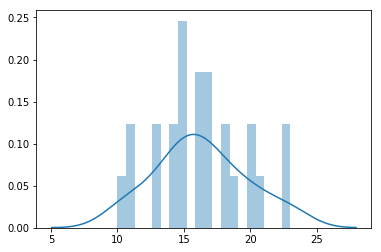

In [21]:
sns.distplot(baseline_dist[:,:,1],bins=20)
sns.distplot(stim_dist[:,0,1],bins=20)
plt.show()

In [ ]:
sns.s